In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm
import xml.etree.ElementTree as ET

In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="eSzt9jqUwL3SzdHp0dmr")
project = rf.workspace("mayhoc").project("coconut-tree-disease")
version = project.version(8)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to coconut-tree-disease-8 in yolov8:: 100%|██████████| 4474/4474 [00:00<00:00, 6064.53it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
data_path = "/content/coconut-tree-disease-8"
image_files = glob(os.path.join(data_path, "train", "images", "*.jpg"))
label_files = glob(os.path.join(data_path, "train", "labels", "*.txt"))
print(f"Number of images: {len(image_files)}")
print(f"Number of label files: {len(label_files)}")

Number of images: 1661
Number of label files: 1661


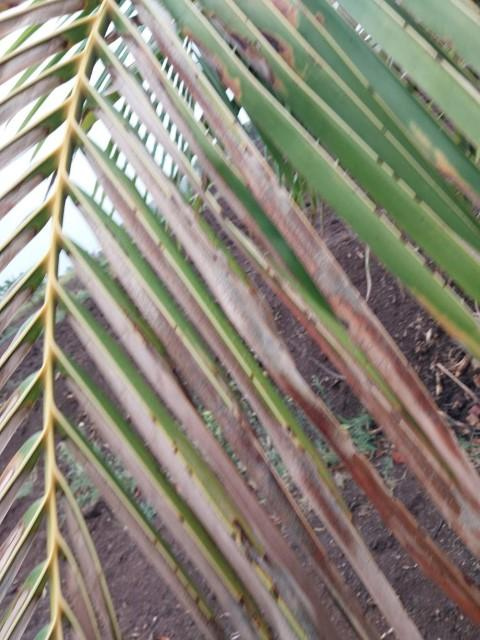

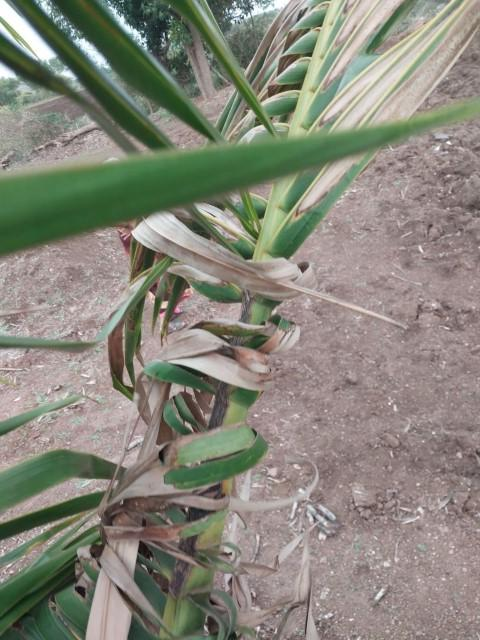

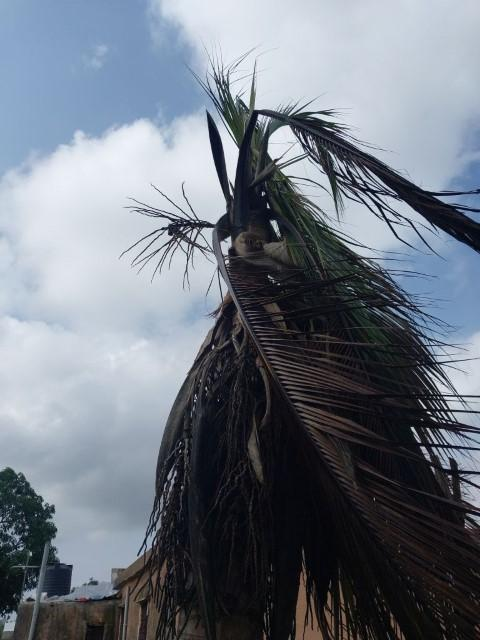

In [5]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/coconut-tree-disease-8/train/images/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [6]:
import yaml
with open("/content/coconut-tree-disease-8/data.yaml") as stream:
    try:
        print(yaml.safe_load(stream))
    except yaml.YAMLError as exc:
        print(exc)

{'names': ['bud root dropping', 'bud rot', 'gray leaf spot', 'leaf rot', 'stembleeding'], 'nc': 5, 'roboflow': {'license': 'Public Domain', 'project': 'coconut-tree-disease', 'url': 'https://universe.roboflow.com/mayhoc/coconut-tree-disease/dataset/8', 'version': 8, 'workspace': 'mayhoc'}, 'test': '../test/images', 'train': '../train/images', 'val': '../valid/images'}


In [7]:
def preprocess_image(image_path, target_size=(640, 640)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = image / 255.0
    return image
preprocessed_images = [preprocess_image(img_path) for img_path in image_files[:10]]

In [8]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 920, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.11/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are frozenset({'benchmark', 'train', 'val', 'predict', 'track', 'export'}).

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of frozenset({'pose', 'classify', 'detect', 'obb', 'segment'})
                MODE (required) is one of frozenset({'benchmark', 'train', 'val', 'predict', 'track', 'export'})
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' tha

In [9]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/coconut-tree-disease-8/data.yaml epochs=4 imgsz=640 batch=16 lr0=0.001 lrf=0.01 momentum=0.937 weight_decay=0.0005 degrees=10 translate=0.1 scale=0.5 flipud=0.5 fliplr=0.5 mosaic=1 device=0 amp=True

100% 21.5M/21.5M [00:00<00:00, 105MB/s]
Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/coconut-tree-disease-8/data.yaml, epochs=4, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

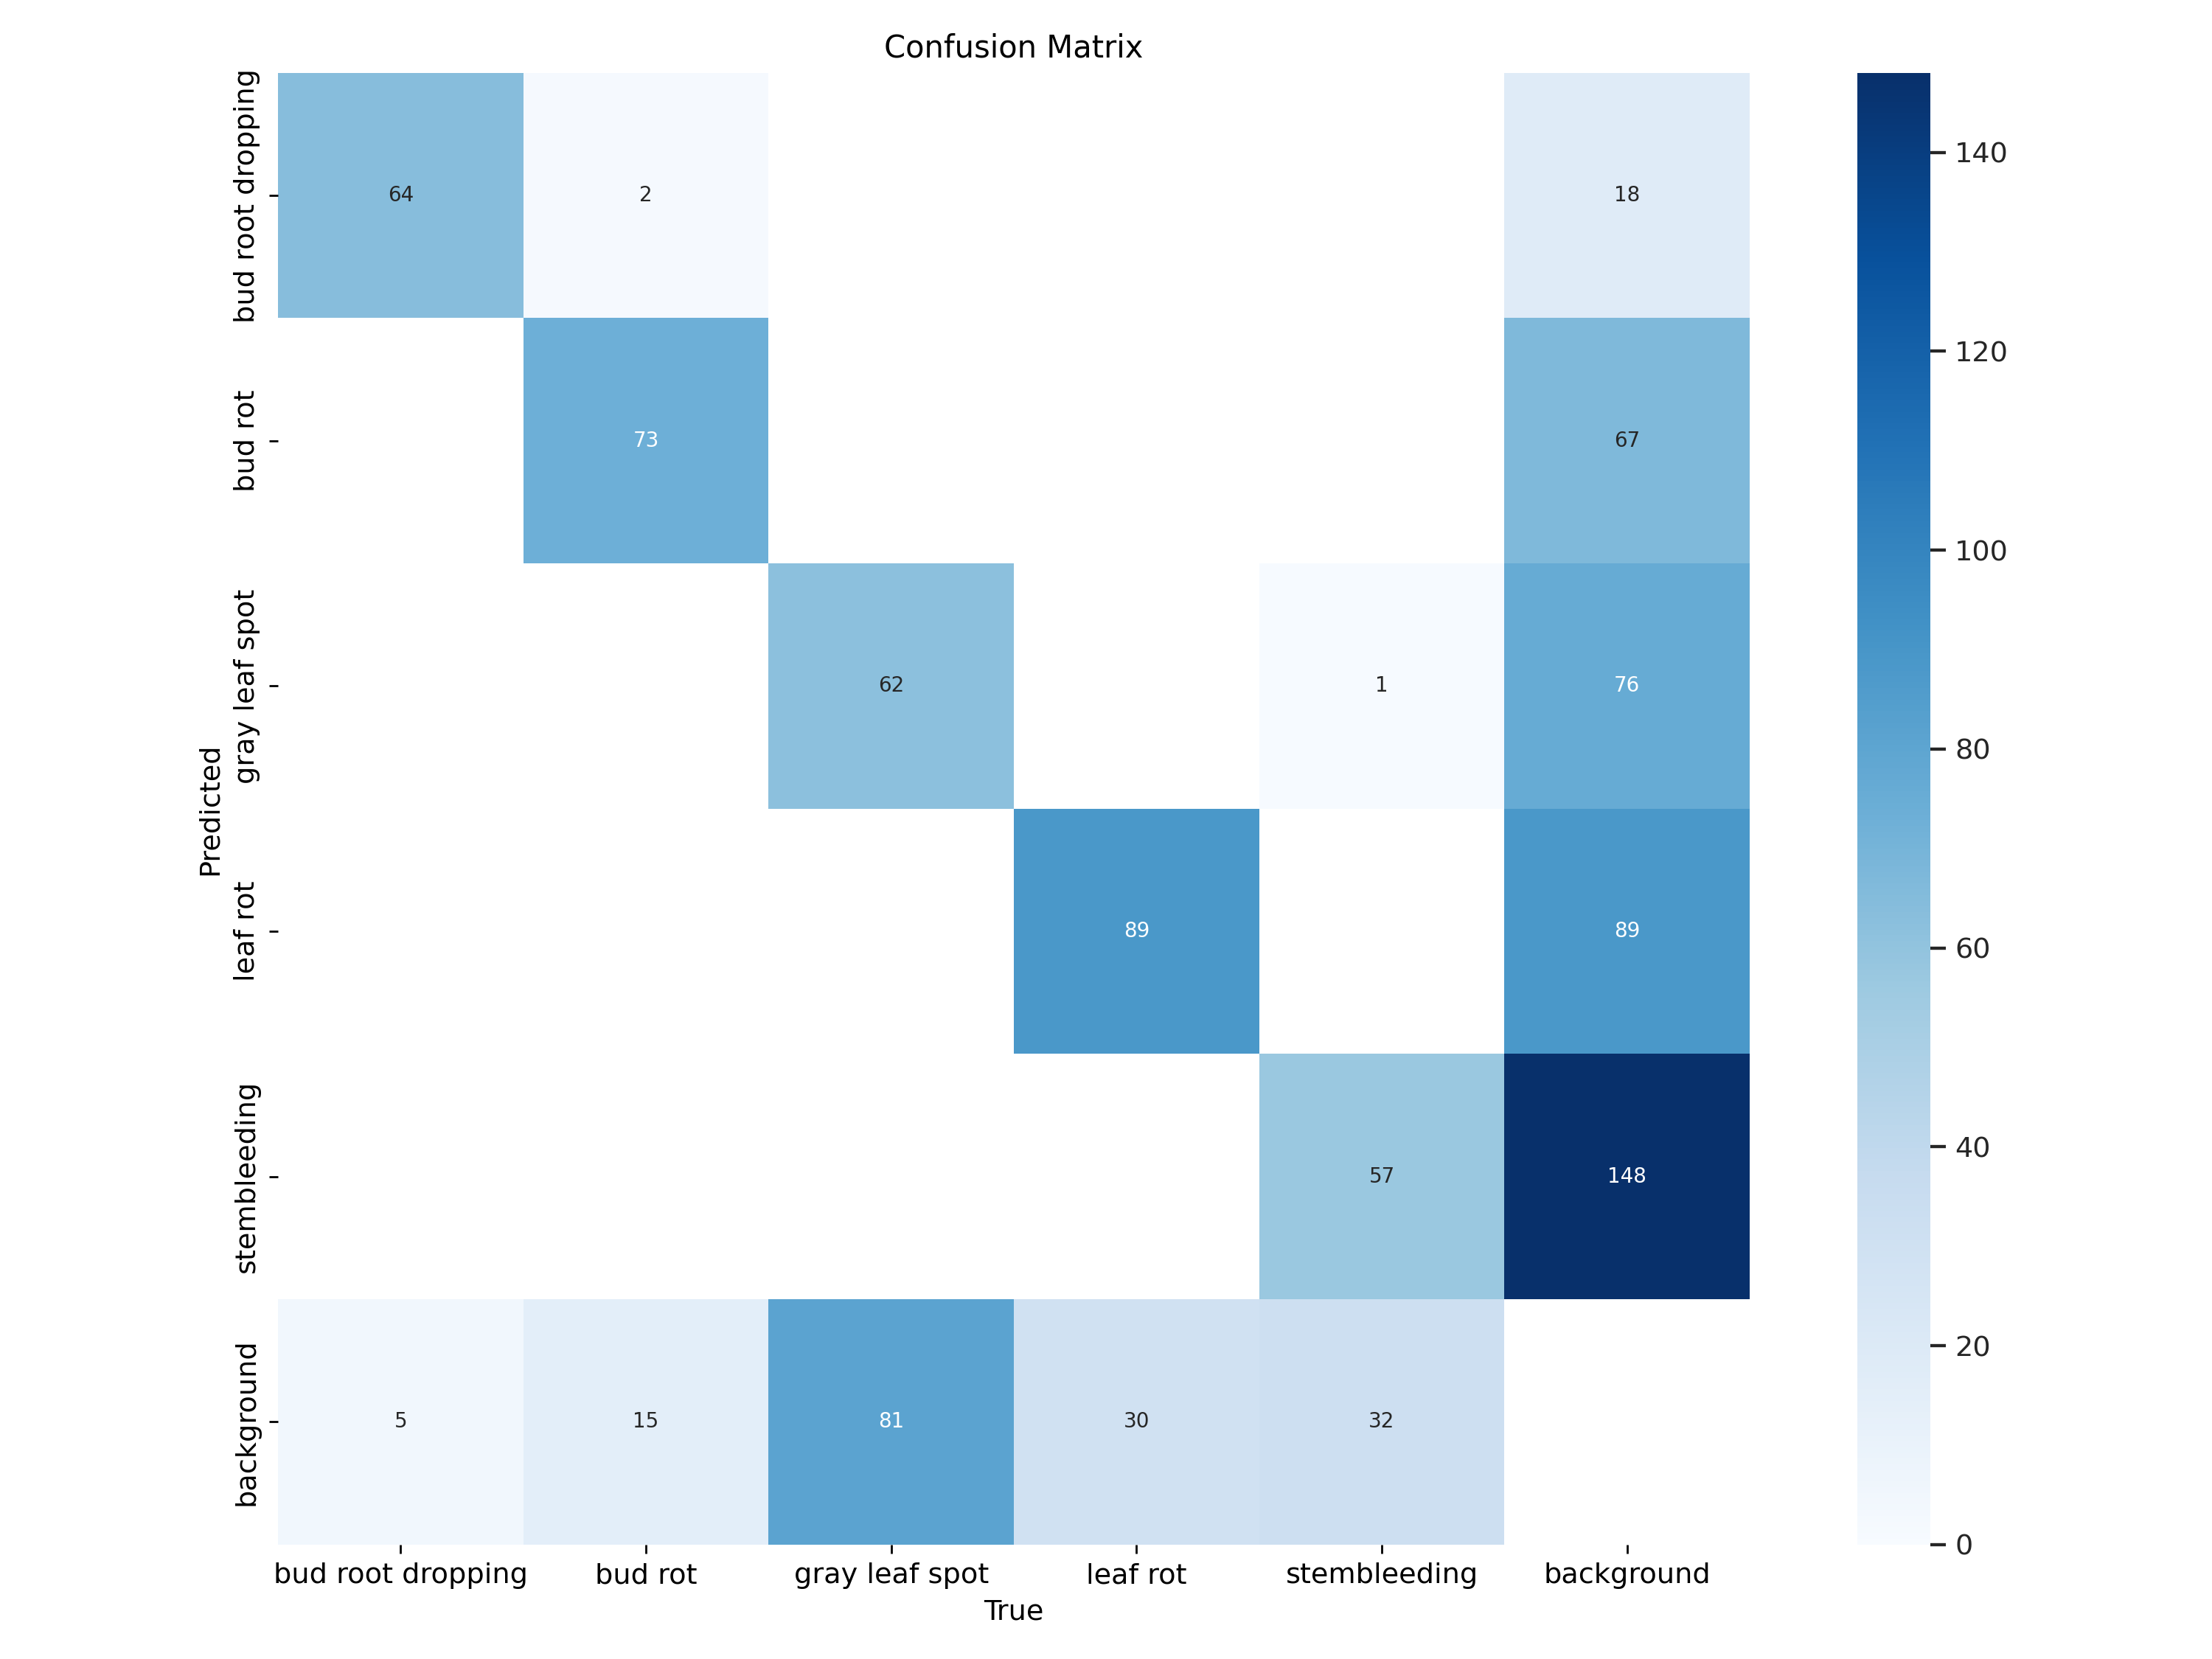

In [10]:
from IPython.display import Image
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

In [11]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/coconut-tree-disease-8/valid/labels.cache... 342 images, 0 backgrounds, 0 corrupt: 100% 342/342 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 297, len(boxes) = 511. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 22/22 [00:05<00:00,  3.74it/s]
                   all        342        511      0.632      0.588      0.587      0.266
     bud root dropping         63         69      0.897      0.855      0.928      0.562
               bud rot         78         90      0.661      0.733      0.699      0.243
        gray leaf spot         65  

In [12]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save_txt=true save_conf=true

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs

image 1/228 /content/coconut-tree-disease-8/test/images/BudRootDropping002_jpg.rf.b879294405b2b9d03e410c41fe643aab.jpg: 640x480 1 bud root dropping, 40.6ms
image 2/228 /content/coconut-tree-disease-8/test/images/BudRootDropping004_jpg.rf.a87695e778cd02c571f2a784663ac6a7.jpg: 640x480 1 bud root dropping, 12.1ms
image 3/228 /content/coconut-tree-disease-8/test/images/BudRootDropping005_jpg.rf.5c8fad6f3728acf86ec3d5367a71f8e4.jpg: 640x480 1 bud root dropping, 12.0ms
image 4/228 /content/coconut-tree-disease-8/test/images/BudRootDropping073_jpg.rf.1194822a818f2563457ed7b86fee7d7f.jpg: 640x480 1 bud root dropping, 12.0ms
image 5/228 /content/coconut-tree-disease-8/test/images/BudRootDropping107_jpg.rf.c881edf9aa9ee51b093af94978fe48e6.jpg: 640x480 1 bud root dropping, 12.0ms
image 6/228 /content/coconut-tree-disease-8/test/images

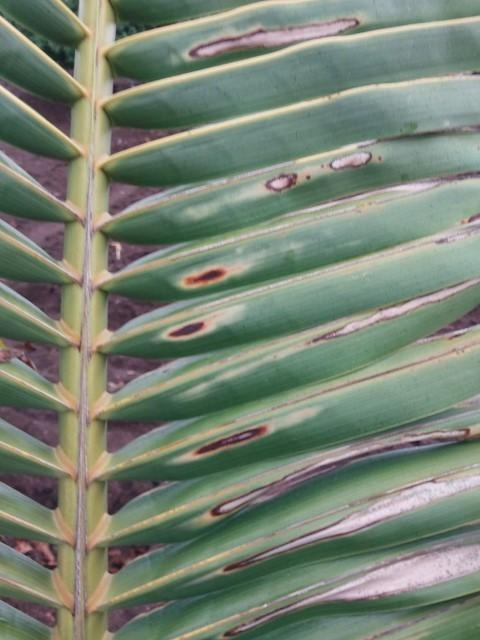

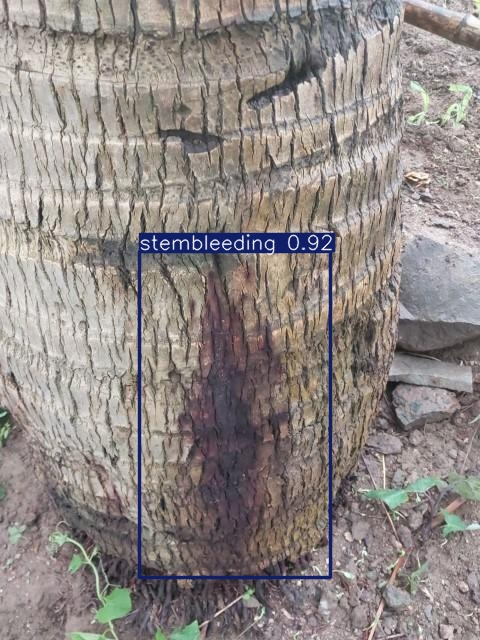

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:2]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [14]:
!pip install opencv-python-headless matplotlib

In [15]:
import numpy as np
import torch
import cv2
from matplotlib import pyplot as plt
from ultralytics import YOLO


In [16]:
!pip install YOLOv8-Explainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 21.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=38341 sha256=4d618c992cede6779411c54661f4189cfe2a07075a8c71d3fb6eab5d41592900
  Stored in directory: /root/.cache/pip/wheels/74/49/bf/77ae8f382e1f0057897d00202b6647ec539c995f384f9a8eec
Successfully built grad-cam


In [30]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA
from IPython.display import display, Image

model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input

last_conv_layer_name = "block14_sepconv2_act"

def get_img_array(img_path, size):
    img = keras.utils.load_img(img_path, target_size=size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

def make_eigencam_heatmap(img_array, model, last_conv_layer_name):

    conv_output_model = keras.models.Model(
        model.inputs, model.get_layer(last_conv_layer_name).output
    )

    conv_outputs = conv_output_model(img_array)
    conv_outputs = conv_outputs[0].numpy()

    H, W, C = conv_outputs.shape
    reshaped = conv_outputs.reshape((H * W, C))

    pca = PCA(n_components=1)
    pca.fit(reshaped)
    pc = pca.components_[0]

    heatmap = reshaped @ pc.T
    heatmap = heatmap.reshape((H, W))

    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap

def display_eigencam(img_path, heatmap, alpha=0.4):
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    heatmap = np.uint8(255 * heatmap)
    jet = mpl.colormaps["jet"]
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    display(superimposed_img)

def generate_eigencam_heatmap(img_path):
    img_array = get_img_array(img_path, img_size)
    img_array = preprocess_input(img_array)

    model = model_builder(weights='imagenet')

    heatmap = make_eigencam_heatmap(img_array, model, last_conv_layer_name)

    display_eigencam(img_path, heatmap)


In [31]:
img_path = "/content/coconut-tree-disease-8/test/images/BudRootDropping073_jpg.rf.1194822a818f2563457ed7b86fee7d7f.jpg"
generate_eigencam_heatmap(img_path)

The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_536']
Received: inputs=Tensor(shape=(1, 299, 299, 3))


InvalidArgumentError: Exception encountered when calling Conv2D.call().

[1m{{function_node __wrapped__Conv2D_device_/job:localhost/replica:0/task:0/device:GPU:0}} No DNN in stream executor. [Op:Conv2D][0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(1, 299, 299, 3), dtype=float32)

In [26]:
img_path = "/content/coconut-tree-disease-8/test/images/GrayLeafSpot1962_jpg.rf.a3111ff5f5f22e956b84e435157eb63d.jpg"
generate_eigencam_heatmap(img_path)

The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_268']
Received: inputs=Tensor(shape=(1, 299, 299, 3))


InvalidArgumentError: Exception encountered when calling Conv2D.call().

[1m{{function_node __wrapped__Conv2D_device_/job:localhost/replica:0/task:0/device:GPU:0}} No DNN in stream executor. [Op:Conv2D][0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(1, 299, 299, 3), dtype=float32)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA
from IPython.display import display

model = keras.applications.xception.Xception(weights="imagenet")
last_conv_layer_name = "block14_sepconv2_act"
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input

def get_img_array(img_path, size):
    img = keras.utils.load_img(img_path, target_size=size)
    img_array = keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def make_eigencam_heatmap(img_tensor, model, last_conv_layer_name):
    # Ensure input is a Tensor
    if not isinstance(img_tensor, tf.Tensor):
        img_tensor = tf.convert_to_tensor(img_tensor, dtype=tf.float32)

    grad_model = keras.models.Model(
        inputs=model.input,
        outputs=model.get_layer(last_conv_layer_name).output
    )
    feature_maps = grad_model(img_tensor)
    feature_maps = feature_maps[0].numpy()

    reshaped = feature_maps.reshape((-1, feature_maps.shape[-1]))
    pca = PCA(n_components=1)
    principal_component = pca.fit_transform(reshaped)
    heatmap = principal_component.reshape((feature_maps.shape[0], feature_maps.shape[1]))
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    return heatmap

def display_eigencam(img_path, heatmap, alpha=0.4):
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    heatmap = np.uint8(255 * heatmap)
    jet = plt.cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    display(superimposed_img)

def generate_eigencam_heatmap(img_path):
    img_array = get_img_array(img_path, img_size)
    img_array = preprocess_input(img_array)
    img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)  # convert input
    heatmap = make_eigencam_heatmap(img_tensor, model, last_conv_layer_name)
    display_eigencam(img_path, heatmap)


In [37]:
img_path = "/content/coconut-tree-disease-8/test/images/StemBleeding608_jpg.rf.f85ffa250001c8917479a8507233b157.jpg"
generate_eigencam_heatmap(img_path)


InvalidArgumentError: Exception encountered when calling Conv2D.call().

[1m{{function_node __wrapped__Conv2D_device_/job:localhost/replica:0/task:0/device:GPU:0}} No DNN in stream executor. [Op:Conv2D][0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(1, 299, 299, 3), dtype=float32)


0: 640x640 (no detections), 16.5ms
Speed: 1.3ms preprocess, 16.5ms inference, 6.8ms postprocess per image at shape (1, 3, 640, 640)
Feature maps shape: torch.Size([1, 256, 20, 20])


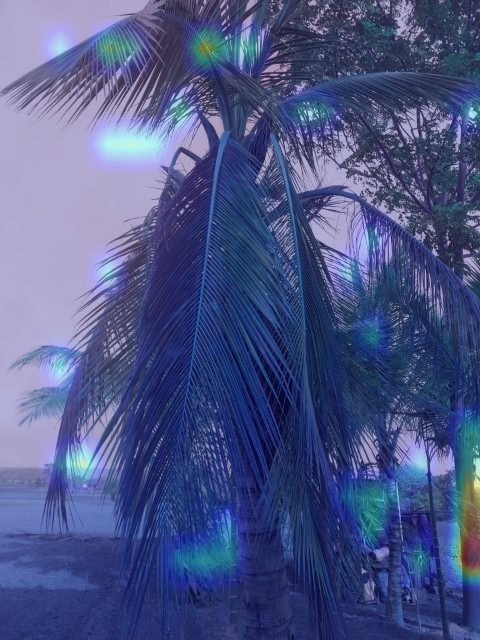

In [53]:
import cv2
import numpy as np
import torch
from ultralytics import YOLO
from torchvision import transforms
from PIL import Image
from google.colab.patches import cv2_imshow

# Load the trained YOLOv8 model
model = YOLO('/content/yolov8s.pt')  # Your model path

# Function to register a hook and get feature maps from a specific layer
def get_feature_maps(model, img_tensor, layer_name='model.model.19'):
    feature_maps = None

    def hook(module, input, output):
        nonlocal feature_maps
        feature_maps = output

    model.eval()
    with torch.no_grad():
        for name, module in model.named_modules():
            if name == layer_name:
                handle = module.register_forward_hook(hook)
                break
        else:
            raise ValueError(f"Layer {layer_name} not found in the model.")

        model(img_tensor)
        handle.remove()

    if feature_maps is None:
        raise ValueError("Feature maps could not be extracted.")

    if isinstance(feature_maps, tuple):
        feature_maps = feature_maps[0]

    return feature_maps

# EigenCAM implementation with enhanced normalization and thresholding
def compute_eigencam(feature_maps):
    if len(feature_maps.shape) != 4:
        raise ValueError(f"Expected 4D feature maps, got shape {feature_maps.shape}")

    batch_size, channels, height, width = feature_maps.size()
    feature_maps = feature_maps.view(batch_size, channels, height * width)

    cov_matrix = torch.matmul(feature_maps, feature_maps.transpose(1, 2))
    eigenvalues, eigenvectors = torch.linalg.eigh(cov_matrix)
    principal_component = eigenvectors[:, -1]
    cam = torch.matmul(principal_component, feature_maps).view(height, width)

    # Normalize to [0, 1]
    cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)

    # Apply a stronger power transform to emphasize high activations
    cam = torch.pow(cam, 3)  # Increased exponent from 2 to 3

    # Apply thresholding to suppress low activations
    threshold = 0.3  # Suppress values below this threshold
    cam = torch.where(cam < threshold, torch.zeros_like(cam), cam)

    # Re-normalize after thresholding
    cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)
    return cam.cpu().numpy()

# Overlay heatmap on original image
def overlay_heatmap(image, heatmap, alpha=0.7):
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
    return overlay

# Main function to generate heatmap
def generate_eigencam_heatmap(image_path, output_path='heatmap_output.jpg'):
    image = Image.open(image_path).convert('RGB')
    original_image = np.array(image)
    preprocess = transforms.Compose([
        transforms.Resize((640, 640)),
        transforms.ToTensor(),
    ])
    img_tensor = preprocess(image).unsqueeze(0)

    feature_maps = get_feature_maps(model, img_tensor)
    print(f"Feature maps shape: {feature_maps.shape}")

    heatmap = compute_eigencam(feature_maps)
    result_image = overlay_heatmap(original_image, heatmap)

    cv2.imwrite(output_path, result_image)
    cv2_imshow(result_image)

# Example usage
if __name__ == "__main__":
    image_path = '/content/coconut-tree-disease-8/test/images/BudRootDropping107_jpg.rf.c881edf9aa9ee51b093af94978fe48e6.jpg'
    generate_eigencam_heatmap(image_path)

In [62]:
pip install grad-cam

In [63]:
from pytorch_grad_cam import EigenCAM

In [76]:
pip install torchcam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.9 MB/s eta 0:00:00


In [78]:
from ultralytics import YOLO

# Load your trained YOLOv8 model (replace with your path)
model = YOLO("/content/runs/detect/train/weights/best.pt")


In [4]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from torchcam.methods import GradCAMpp  # GradCAM++
from torchvision.transforms import functional as F

# Load your trained YOLOv8 model
model = YOLO("best.pt")
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

# Load and preprocess the image
img_path = "your_image.jpg"  # Replace with your image path
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img_rgb, (640, 640))
img_tensor = torch.from_numpy(img_resized).permute(2, 0, 1).float().unsqueeze(0) / 255.0
img_tensor = img_tensor.to(device)

# Get the target feature layer for YOLOv8 (usually -3 from end)
target_layer = model.model.model[-3]

# Set up GradCAM++
cam_extractor = GradCAMpp(model.model, target_layer)

# Forward pass through model
with torch.no_grad():
    outputs = model.model(img_tensor)

# If predictions exist, take the first detection class index
preds = outputs[0].pred[0]
if len(preds) > 0:
    class_idx = int(preds[5].item())
else:
    class_idx = 0  # fallback

# Generate CAM
activation_map = cam_extractor(class_idx, outputs[0].pred)

# Convert and overlay heatmap
cam = activation_map[0].cpu().numpy()
cam_resized = cv2.resize(cam, (img.shape[1], img.shape[0]))
heatmap = cv2.applyColorMap(np.uint8(255 * cam_resized), cv2.COLORMAP_JET)
overlay = cv2.addWeighted(img_rgb, 0.5, heatmap, 0.5, 0)

# Display heatmap overlay
plt.figure(figsize=(10, 10))
plt.imshow(overlay)
plt.axis('off')
plt.show()


WARNING ⚠️ torchvision==0.21 is incompatible with torch==1.13.
Run 'pip install torchvision==0.14' to fix torchvision or 'pip install -U torch torchvision' to update both.
For a full compatibility table see https://github.com/pytorch/vision#installation


ModuleNotFoundError: No module named 'torch._custom_ops'

In [3]:
import torchcam
print(torchcam.__version__)


0.3.2


In [1]:
pip install torchcam==0.3.2
